In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd

(1036800, 9)
(64800, 9)
(10368, 9)


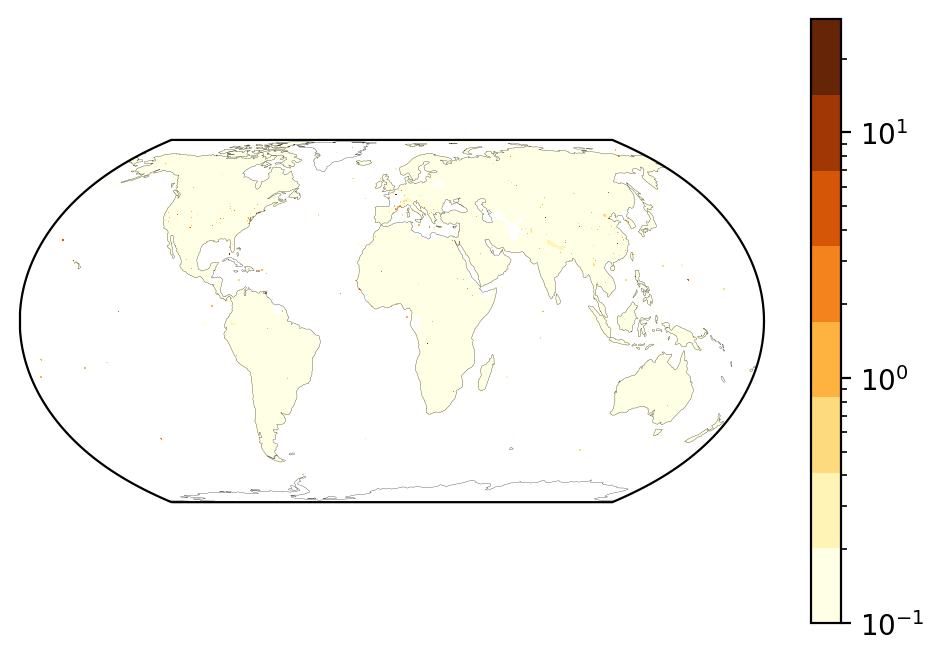

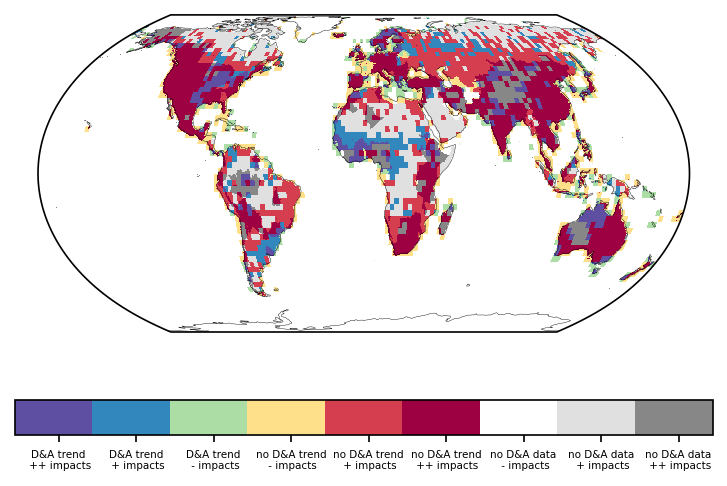

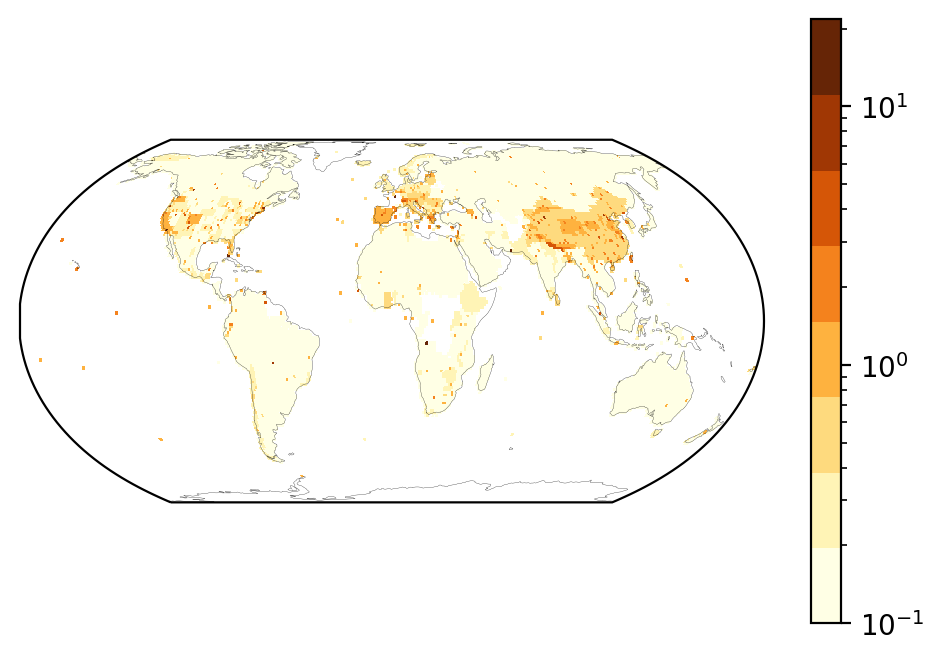

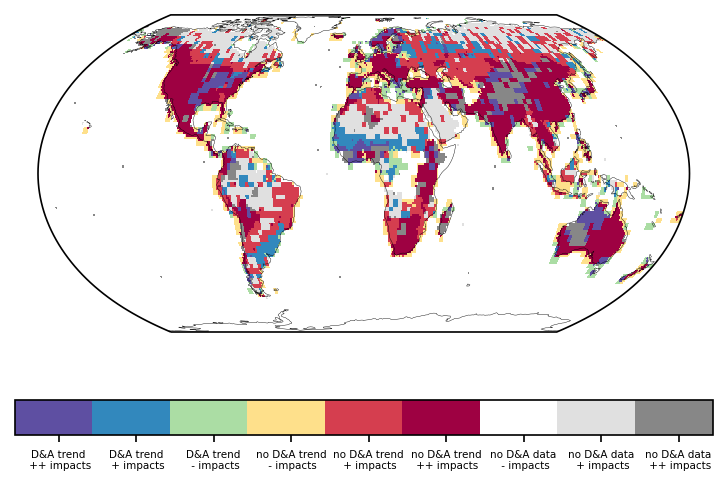

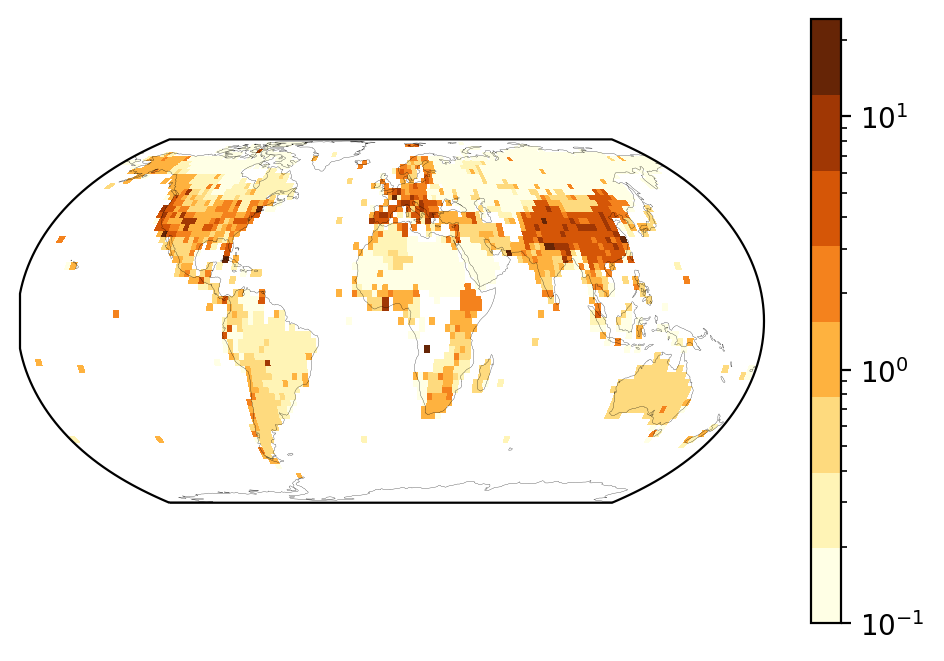

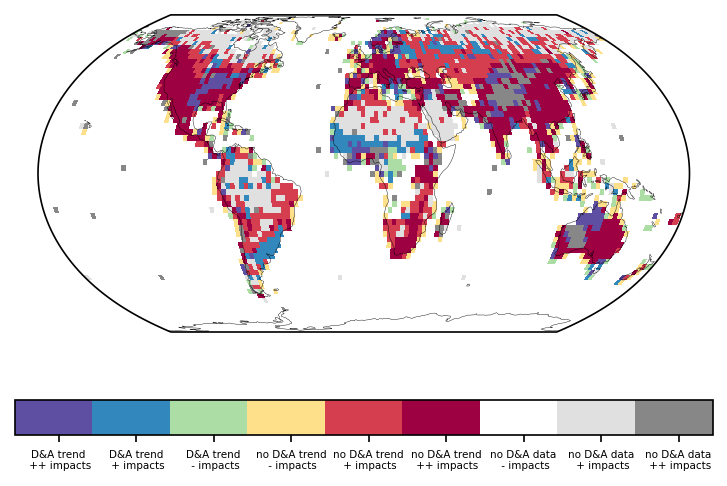

In [24]:
for degrees in [.25,1,2.5]:
    ndf = pd.read_csv(f'../data/gridcell_studies_6 - Precipitation - upper_pred_{degrees}.csv')
    
    print(ndf.shape)

    plt.figure(dpi=200)
    
    ndf.loc[ndf['LON']>180,"LON"]-=360

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.n_study_prop).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    vm = n.max()
    n[n==0] = np.nan

    ax.coastlines(lw=0.1)
    mesh = ax.pcolormesh(
        ndf.LON.unique()-degrees*0.5,
        ndf.LAT.unique()-degrees*0.5,
        n,
        norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
        cmap=plt.cm.get_cmap('YlOrBr',8), 
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh)
    
    
    ndf["evidence_cat"] = np.nan
    
    lots = ndf.n_study_prop.quantile(.9)

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 3

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 2

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 1

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 4

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 5

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 6
    
    colors = ["#5e4fa2","#3288bd","#abdda4","#fee08b","#d53e4f","#9e0142"]

    cmap = mpl.colors.ListedColormap(colors)

    do_na = True
    if do_na:
        cmap = mpl.colors.ListedColormap(colors+["white","#e0e0e0","#878787"])
        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']==0),"evidence_cat"
        ] = 7

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>0),"evidence_cat"
        ] = 8

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>lots),"evidence_cat"
        ] = 9
        
    plt.figure(dpi=150)

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.evidence_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

    ax.coastlines(lw=0.2)
    mesh = ax.pcolormesh(
        ndf.LON.unique()-degrees*0.5,
        ndf.LAT.unique()-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

    cbar.set_ticklabels([
        "D&A trend\n ++ impacts",
        "D&A trend\n + impacts",
        "D&A trend\n - impacts",
        "no D&A trend\n - impacts",
        "no D&A trend\n + impacts",
        "no D&A trend\n ++ impacts",
        "no D&A data\n - impacts",
        "no D&A data\n + impacts",
        "no D&A data\n ++ impacts"
    ])
    cbar.ax.tick_params(labelsize=5)

        
    

(64800, 9)
(10368, 9)


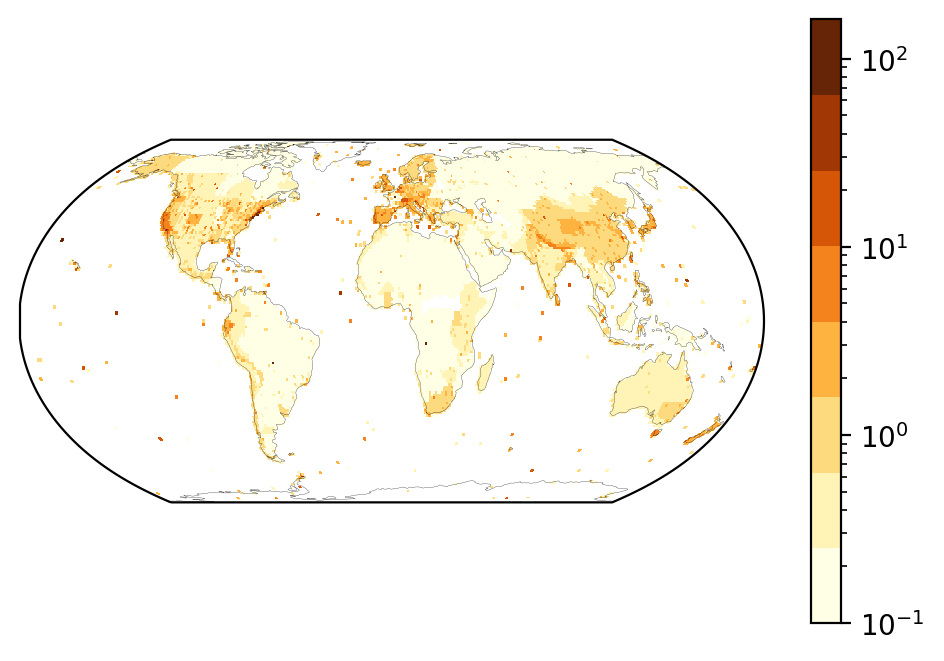

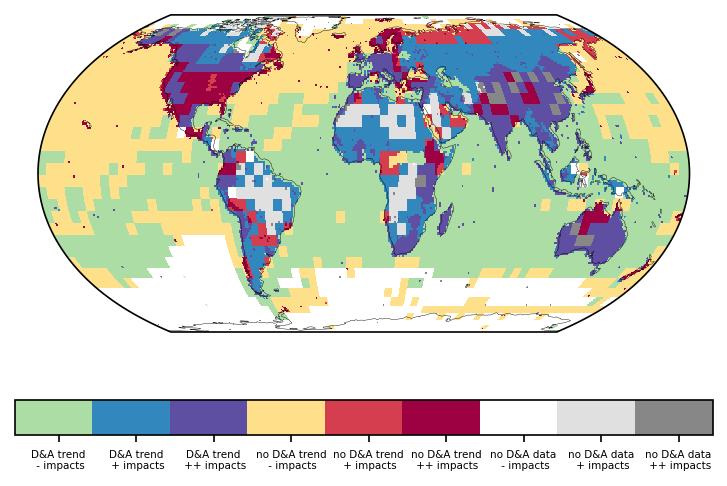

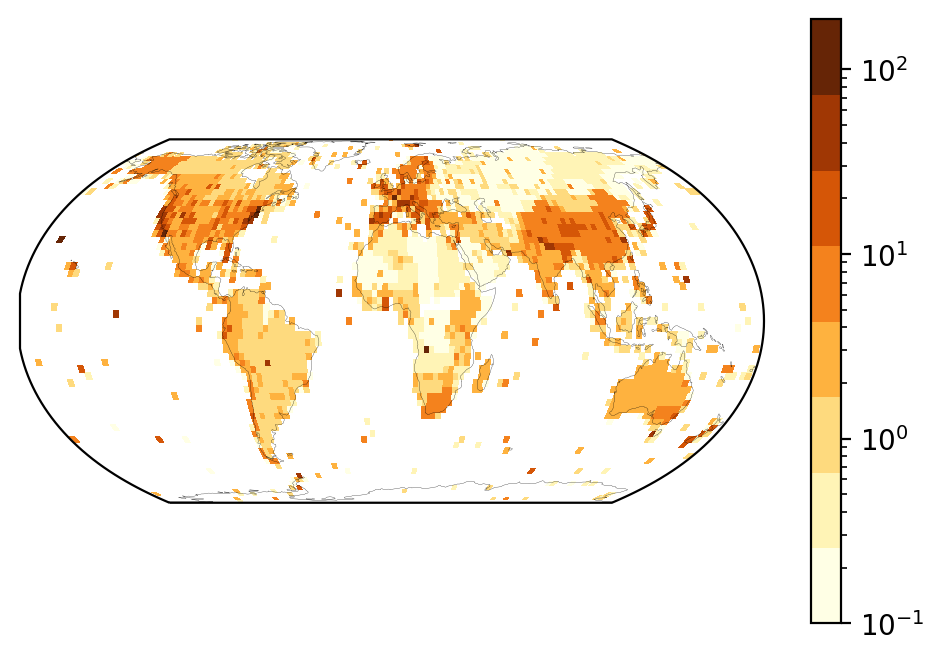

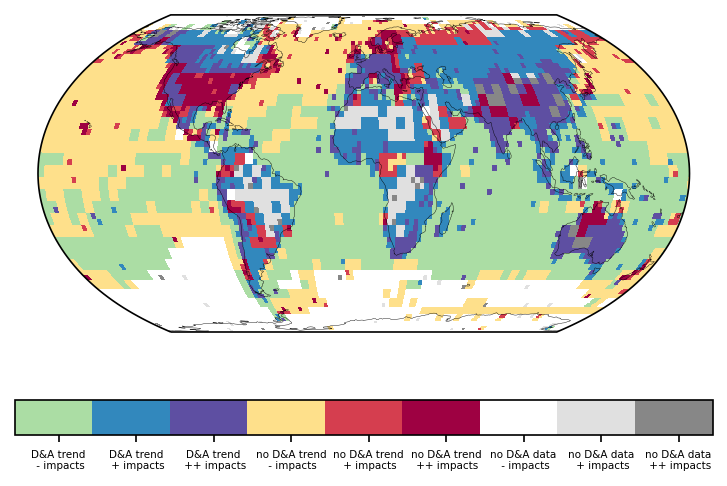

In [23]:
for degrees in [1, 2.5]:
    ndf = pd.read_csv(f'../data/gridcell_studies_6 - Temperature - upper_pred_{degrees}.csv')
    
    print(ndf.shape)

    plt.figure(dpi=200)
    
    ndf.loc[ndf['LON']>180,"LON"]-=360

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.n_study_prop).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))
    vm = n.max()
    n[n==0] = np.nan

    ax.coastlines(lw=0.1)
    mesh = ax.pcolormesh(
        ndf.LON.unique()-degrees*0.5,
        ndf.LAT.unique()-degrees*0.5,
        n,
        norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
        cmap=plt.cm.get_cmap('YlOrBr',8), 
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh)
    
    
    ndf["evidence_cat"] = np.nan
    
    lots = ndf.n_study_prop.quantile(.9)

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 1

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 2

    ndf.loc[
        (abs(ndf['da_cat'])>1) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 3

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']==0),"evidence_cat"
    ] = 4

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>0),"evidence_cat"
    ] = 5

    ndf.loc[
        (abs(ndf['da_cat'])==0) & (ndf['n_study_prop']>lots),"evidence_cat"
    ] = 6
    
    colors = ["#abdda4","#3288bd", "#5e4fa2","#fee08b","#d53e4f","#9e0142"]

    cmap = mpl.colors.ListedColormap(colors)

    do_na = True
    if do_na:
        cmap = mpl.colors.ListedColormap(colors+["white","#e0e0e0","#878787"])
        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']==0),"evidence_cat"
        ] = 7

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>0),"evidence_cat"
        ] = 8

        ndf.loc[
            (pd.isna(ndf['da_cat'])) & (ndf['n_study_prop']>lots),"evidence_cat"
        ] = 9
        
    plt.figure(dpi=150)

    ax = plt.axes(projection=ccrs.EqualEarth())

    n = np.array(ndf.evidence_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

    ax.coastlines(lw=0.2)
    mesh = ax.pcolormesh(
        ndf.LON.unique()-degrees*0.5,
        ndf.LAT.unique()-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )
    cbar = plt.colorbar(mesh, orientation="horizontal")
    cbar.set_ticks(np.array(np.linspace(1,cmap.N,cmap.N+1)[:-1]+0.5))

    cbar.set_ticklabels([
        "D&A trend\n - impacts",
        "D&A trend\n + impacts",
        "D&A trend\n ++ impacts",
        "no D&A trend\n - impacts",
        "no D&A trend\n + impacts",
        "no D&A trend\n ++ impacts",
        "no D&A data\n - impacts",
        "no D&A data\n + impacts",
        "no D&A data\n ++ impacts"
    ])
    cbar.ax.tick_params(labelsize=5)

        
    